## Task - 9 (Hypothesis Testing)

             - Bharath C S


# Understanding the Hypothesis Testing

Step - 1:  
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

## Hypothesis Testing for unknown Variance of Population

In [33]:
## import statements
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [2]:
# t_score for sampling distributions

def t_score(sample_size, sample_mean, pop_mean, s):
    numerator = sample_mean - pop_mean
    denomenator = s / sample_size**0.5
    return numerator / denomenator

In [3]:
# code calculate s value
def s_value(lst):
    avg = sum(lst) / len(lst)
    var = sum((x-avg)**2 for x in lst) / (len(lst)-1)
    s = var**0.5
    return s
    

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~ </b>

Step - 1:  
Alternate Hypothesis (Bold claim): $$ H_1: \mu \neq 500 $$
Null Hypothesis (Status Quo): $$ H_0: \mu = 500 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [490, 220, 470, 500, 495, 496, 496, 498, 508, 480] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{{s}/\sqrt[2]{n}}$$

   where $$ s = \sqrt[2]\frac{\sum{\bar{x} - \mu}}{{n-1}} $$

Step - 4:
Decide $ \alpha $ or significance level

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value


In [4]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sum(l)/len(l)

465.3

In [5]:
# Two tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


* here df refers to degree of freedom = n - 1 (10 - 1 = 9)

In [6]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
print('*'* 30)
print()
s = s_value(l)
print("sample size(n) = ",sample_size)
print("sample mean(x bar) = ",sample_mean)
print("pop mean (mu) = ", pop_mean)
print("s = ", s)
print()
print('*'*30)

******************************

sample size(n) =  10
sample mean(x bar) =  465.3
pop mean (mu) =  500
s =  86.84859110991827

******************************


In [7]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, s)

print(t)

-1.2634751284446715


Text(465.3, 0.0007, 'x_bar')

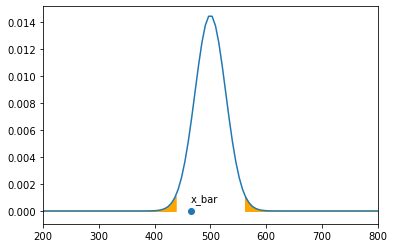

In [13]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 200
x_max = 800


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = s / (sample_size)**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))




>* In this case sample mean does not falls in the rejection region
 i.e. here we fail to reject the Null Hypothesis

In [14]:
# Conclusion using z test

if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [15]:
# Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818092
Fail to reject Null Hypothesis


<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~ </b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu > 4 $$
Null Hypothesis (Status Quo): $$ H_0: \mu <= 4 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$
   where $$ s = \sqrt[2]\frac{\sum{\bar{x} - \mu}}{{n-1}} $$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if ? $$

Step - 5.2: Compute p-value



In [16]:
l1 = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]

sum(l1)/len(l1)

4.25

In [17]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 4.25
pop_mean = 4
print('*'* 30)
print()
s = s_value(l1)
print("sample size(n) = ",sample_size)
print("sample mean(x bar) = ",sample_mean)
print("pop mean (mu) = ", pop_mean)
print("s = ", s)
print()
print('*'*30)

******************************

sample size(n) =  10
sample mean(x bar) =  4.25
pop mean (mu) =  4
s =  0.8506963092234007

******************************


In [18]:
# One tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 9)

print(t_critical)

1.8331129326536333


In [19]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, s)

print(t)

0.9293203772845853


Text(4.25, 0.1, 'x_bar')

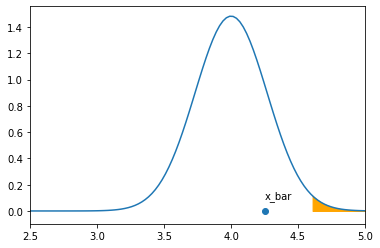

In [20]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 2.5
x_max = 5.0


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = s / (sample_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))



 > * In this case sample mean does not falls in the rejection region i.e.It fails to Reject the Null Hypothesis

In [21]:
# Conclusion using t test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [22]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.17636153894527018
Fail to reject Null Hypothesis


<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~(Given that the population std is 1)~ </b>

Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu > 15 $$
Null Hypothesis (Status Quo): $$ H_0: \mu <= 15 $$

Step - 2:  
* Collect a sample of size n = 10 $$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

Step - 3:
Compute Test Statistic: $$ t = \frac{\bar{x} - \mu}{\sigma/s[2]{n}}$$

   where $$ s = \sqrt[2]\frac{\sum{\bar{x} - \mu}}{{n-1}} $$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [23]:
l2 = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]

sum(l2)/len(l2)

15.098999999999998

In [24]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 15.1
pop_mean = 15
print('*'* 30)
print()
s = s_value(l2)
print("sample size(n) = ",sample_size)
print("sample mean(x bar) = ",sample_mean)
print("pop mean (mu) = ", pop_mean)
print("s = ", s)
print()
print('*'*30)

******************************

sample size(n) =  20
sample mean(x bar) =  15.1
pop mean (mu) =  15
s =  1.0253671999517255

******************************


In [26]:
# One tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [27]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, s)

print(t)

0.4361496988795929


Text(15.1, 0.1, 'x_bar')

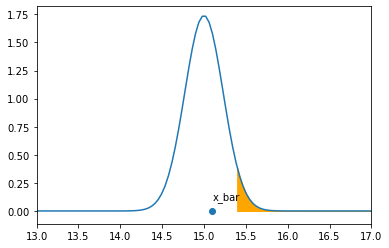

In [29]:
x_min = 13
x_max = 17

mean = pop_mean
std = s / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))



> * In this case sample mean does not falls in the rejection region i.e. Fail to Reject the Null Hypothesis

In [30]:
# Conclusion using t test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [31]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.33136406031033616
Fail to reject Null Hypothesis


<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~ </b>


Step - 1:  
Alternate Hypothesis (Bold Claim): $$ H_1: \mu < 100 $$
Null Hypothesis (Status Quo): $$ H_0: \mu >= 100 $$

Step - 2:  
* Collect a sample of size n = 100
* Compute sample mean $$ \bar{x} \ = \ 97.5 $$

Step - 3:
Compute Test Statistic: $$ z = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$

   where $$ s = \sqrt[2]\frac{\sum{\bar{x} - \mu}}{{n-1}} $$

Step - 4:
Decide $ \alpha $

Step - 5.1: ? tailed t-test: $$ reject \ H_0 \ if \ ? $$

Step - 5.2: Compute p-value

In [32]:
# Defining the sample and population parameters

sample_size = 100
sample_mean = 97.5
pop_mean = 100
print('*'* 30)
print()
s = 7
print("sample size(n) = ",sample_size)
print("sample mean(x bar) = ",sample_mean)
print("pop mean (mu) = ", pop_mean)
print("s = ", s)
print()
print('*'*30)

******************************

sample size(n) =  100
sample mean(x bar) =  97.5
pop mean (mu) =  100
s =  7

******************************


In [34]:
# One tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 99)

print(t_critical)

1.6603911559963895


In [35]:
# Calculating the t-score

t = t_score(sample_size, sample_mean, pop_mean, s)

print(t)

-3.5714285714285716


Text(97.5, 0.02, 'x_bar')

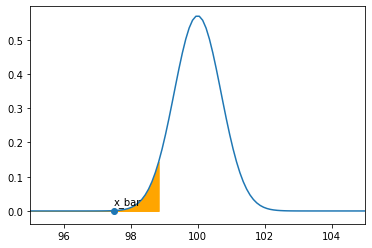

In [36]:
x_min = 95
x_max = 105

mean = pop_mean
std = s / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)


plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))



 > * In this case sample mean falls in the rejection region i.e. Reject Null Hypothesis

In [37]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [38]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.00017751969037349546
Reject Null Hypothesis
